Training Decision Tree...
Training SVM...

Evaluating Decision Tree...
Classification Report:
Class 0:
  Precision: 0.8664
  Recall:    0.8935
  F1-score:  0.8798

Class 1:
  Precision: 0.9412
  Recall:    0.9600
  F1-score:  0.9505

Class 2:
  Precision: 0.8342
  Recall:    0.8239
  F1-score:  0.8290

Class 3:
  Precision: 0.7354
  Recall:    0.7390
  F1-score:  0.7372

Class 4:
  Precision: 0.7792
  Recall:    0.8448
  F1-score:  0.8107

Class 5:
  Precision: 0.7797
  Recall:    0.7313
  F1-score:  0.7548

Class 6:
  Precision: 0.9144
  Recall:    0.8954
  F1-score:  0.9048

Class 7:
  Precision: 0.8631
  Recall:    0.8430
  F1-score:  0.8529

Class 8:
  Precision: 0.7636
  Recall:    0.7568
  F1-score:  0.7602

Class 9:
  Precision: 0.7953
  Recall:    0.7852
  F1-score:  0.7902



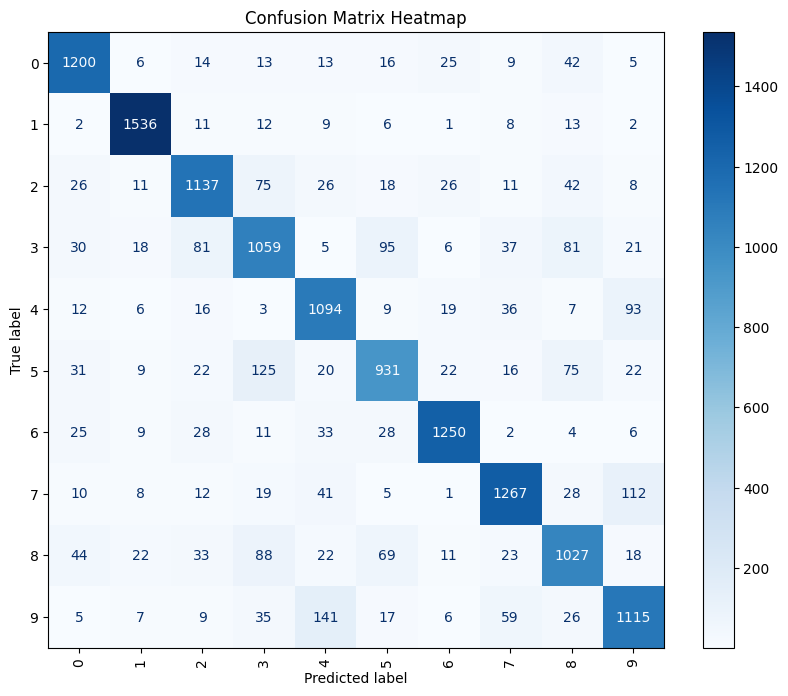


Evaluating SVM...
Classification Report:
Class 0:
  Precision: 0.9778
  Recall:    0.9829
  F1-score:  0.9803

Class 1:
  Precision: 0.9820
  Recall:    0.9912
  F1-score:  0.9866

Class 2:
  Precision: 0.9557
  Recall:    0.9681
  F1-score:  0.9618

Class 3:
  Precision: 0.9392
  Recall:    0.9379
  F1-score:  0.9385

Class 4:
  Precision: 0.9695
  Recall:    0.9583
  F1-score:  0.9639

Class 5:
  Precision: 0.9739
  Recall:    0.9379
  F1-score:  0.9556

Class 6:
  Precision: 0.9815
  Recall:    0.9857
  F1-score:  0.9836

Class 7:
  Precision: 0.9729
  Recall:    0.9554
  F1-score:  0.9641

Class 8:
  Precision: 0.9426
  Recall:    0.9447
  F1-score:  0.9437

Class 9:
  Precision: 0.9316
  Recall:    0.9592
  F1-score:  0.9452



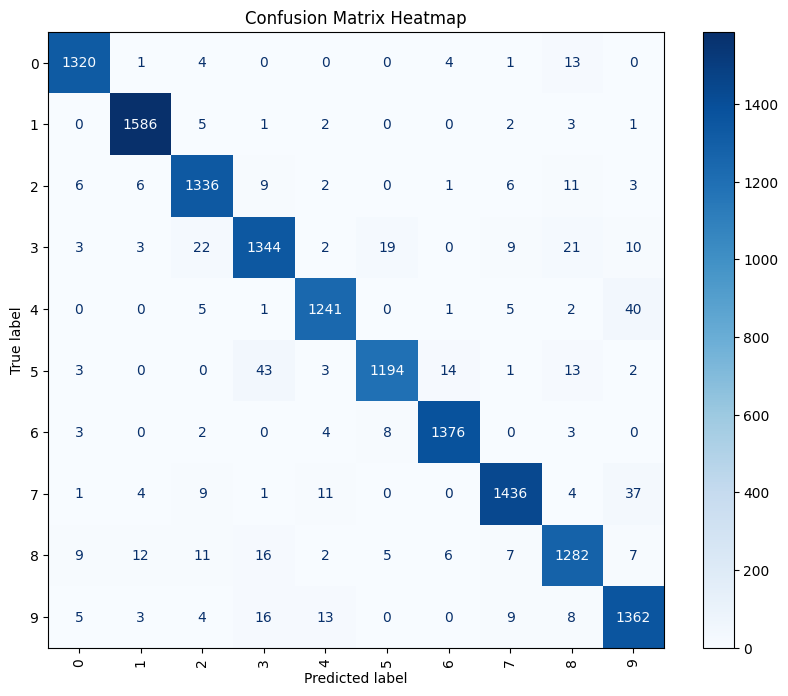

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

data = pd.read_csv('sobel_hog_reduced.csv')
X = data.iloc[:, :-1].values  # All columns except the last
y = data.iloc[:, -1].values  # labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model
print("Training Decision Tree...")
dt_model = DecisionTreeClassifier(random_state=42, max_depth=15, min_samples_leaf=10, min_samples_split=5, criterion='entropy')
dt_model.fit(X_train, y_train)

# Train SVM model
print("Training SVM...")
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Evaluate the models
def evaluate_model(y_true, y_pred, class_names=None):
    # Generate classification report
    report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
    
    print("Classification Report:")
    for cls, metrics in report.items():
        if cls not in {"accuracy", "macro avg", "weighted avg"}:
            print(f"Class {cls}:")
            print(f"  Precision: {metrics['precision']:.4f}")
            print(f"  Recall:    {metrics['recall']:.4f}")
            print(f"  F1-score:  {metrics['f1-score']:.4f}")
            print()
    
    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    
    # Plot confusion matrix as a heatmap
    plt.figure(figsize=(10, 8))
    disp.plot(cmap='Blues', xticks_rotation="vertical", ax=plt.gca())
    plt.title("Confusion Matrix Heatmap")
    plt.show()

# Predict and evaluate the Decision Tree model
print("\nEvaluating Decision Tree...")
y_pred_dt = dt_model.predict(X_test)
evaluate_model(y_test, y_pred_dt, class_names=[str(i) for i in range(10)])

# Predict and evaluate the SVM model
print("\nEvaluating SVM...")
y_pred_svm = svm_model.predict(X_test)
evaluate_model(y_test, y_pred_svm, class_names=[str(i) for i in range(10)])
